In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

In [122]:
k = 2
dx = 1

# largest possible time step that ensures numerical stability
dt = (dx**2) / (4 * k)
W, H, T = 64, 64, 200
u = np.zeros([T, W, H])

# initial configuration (checker pattern 2x2)
u[0, :H//2, :H//2] = 20
u[0, H//2:, H//2:] = 20

In [123]:
# Kernels used to calculate finite differences
kernel_dx_right = np.array([
    [0, 0, 0],
    [0, -1, 1],
    [0, 0, 0]
])

kernel_dx_left = np.array([
    [0, 0, 0],
    [-1, 1, 0],
    [0, 0, 0]
])

kernel_dy_right = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 1, 0]
])

kernel_dy_left = np.array([
    [0, -1, 0],
    [0, 1, 0],
    [0, 0, 0]
])

In [124]:
def enforce_boundary_conditions(inp):
    inp[0, :] = inp[-1, :] = inp[:, 0] = inp[:, -1] = 0
    return inp

In [125]:
def hessian_trace(u):

    dudxl = convolve2d(u, kernel_dx_left, mode='same', fillvalue=0)
    dudxl = enforce_boundary_conditions(dudxl)

    dudxr = convolve2d(u, kernel_dx_right, mode='same', fillvalue=0)
    dudxr = enforce_boundary_conditions(dudxr)

    d2udx2 = dudxr - dudxl

    dudyl = convolve2d(u, kernel_dy_left, mode='same', fillvalue=0)
    dudyl = enforce_boundary_conditions(dudyl)

    dudyr = convolve2d(u, kernel_dy_right, mode='same', fillvalue=0)
    dudyr = enforce_boundary_conditions(dudyr)

    d2udy2 = dudyr - dudyl

    return d2udx2 + d2udy2

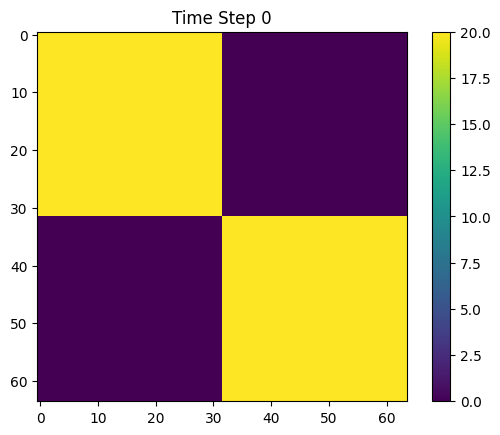

In [126]:

def iterate(u):
    # u_{t + 1} = u + k * (d^2u/dx^2 + d^2u/dy^2)
    gamma = k * dt / (dx ** 2)
    return u + gamma * hessian_trace(u)

for t in range(T - 1):
    u[t + 1] = iterate(u[t])

def update(frame):
    plt.clf()
    plt.imshow(u[frame], cmap='viridis')
    plt.title(f'Time Step {frame}')
    plt.colorbar()

ani = FuncAnimation(plt.gcf(), update, frames=T, interval=100)

HTML(ani.to_jshtml())